In [ ]:
import os

# Set the path to your uploaded dataset (update this path after uploading)
dataset_path = "/content/archive(2).zip"

# Unzipping the dataset
import zipfile
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# Verify the dataset structure
extracted_path = "/content/dataset"
for root, dirs, files in os.walk(extracted_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {len(files)}")


Directory: /content/dataset
Subdirectories: ['Alzheimer_s Dataset']
Files: 0
Directory: /content/dataset/Alzheimer_s Dataset
Subdirectories: ['all image', 'train', 'test']
Files: 0
Directory: /content/dataset/Alzheimer_s Dataset/all image
Subdirectories: []
Files: 5121
Directory: /content/dataset/Alzheimer_s Dataset/train
Subdirectories: ['ModerateDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']
Files: 0
Directory: /content/dataset/Alzheimer_s Dataset/train/ModerateDemented
Subdirectories: []
Files: 52
Directory: /content/dataset/Alzheimer_s Dataset/train/NonDemented
Subdirectories: []
Files: 2560
Directory: /content/dataset/Alzheimer_s Dataset/train/VeryMildDemented
Subdirectories: []
Files: 1792
Directory: /content/dataset/Alzheimer_s Dataset/train/MildDemented
Subdirectories: []
Files: 717
Directory: /content/dataset/Alzheimer_s Dataset/test
Subdirectories: ['ModerateDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']
Files: 0
Directory: /content/dataset/Alzhe

In [ ]:
import os
import cv2
import numpy as np

# Path to the dataset
dataset_path = "/content/dataset/Alzheimer_s Dataset"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Setting the image size
image_size = (224, 224)
data = []
labels = []

def process_folder(folder_path, label_map):
    data = []
    labels = []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            class_label = label_map[category]
            print(f"Processing category: {category}")
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    # Load and preprocess the image
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img = cv2.resize(img, image_size)  # Resize to 224x224
                        data.append(img)
                        labels.append(class_label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(data), np.array(labels)

label_map = {
    "MildDemented": 0,
    "ModerateDemented": 1,
    "NonDemented": 2,
    "VeryMildDemented": 3
}

# Processing subfolders
train_data, train_labels = process_folder(train_path, label_map)
test_data, test_labels = process_folder(test_path, label_map)

# Combine data and normalize
data = np.concatenate([train_data, test_data], axis=0).reshape(-1, 224, 224, 1) / 255.0
labels = np.concatenate([train_labels, test_labels], axis=0)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")


Processing category: ModerateDemented
Processing category: NonDemented
Processing category: VeryMildDemented
Processing category: MildDemented
Processing category: ModerateDemented
Processing category: NonDemented
Processing category: VeryMildDemented
Processing category: MildDemented
Data shape: (6400, 224, 224, 1)
Labels shape: (6400,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (4480, 224, 224, 1), (4480,)
Validation set: (960, 224, 224, 1), (960,)
Testing set: (960, 224, 224, 1), (960,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Defining the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1), kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(len(np.unique(labels)), activation='softmax')  # Output layer for the number of classes
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,168,900 (42.61 MB)

 Trainable params: 11,168,900 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=len(np.unique(labels)))
y_val = to_categorical(y_val, num_classes=len(np.unique(labels)))
y_test = to_categorical(y_test, num_classes=len(np.unique(labels)))

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.4768 - loss: 2.2679 - val_accuracy: 0.5000 - val_loss: 1.1690
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.4951 - loss: 1.1581 - val_accuracy: 0.5323 - val_loss: 1.0834
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5230 - loss: 1.0561 - val_accuracy: 0.5177 - val_loss: 1.0371
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5260 - loss: 1.0411 - val_accuracy: 0.5188 - val_loss: 1.0471
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.5318 - loss: 1.0243 - val_accuracy: 0.5167 - val_loss: 1.0572
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5438 - loss: 0.9857 - val_accuracy: 0.5427 - val_loss: 0.9712
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5694 - loss: 0.9571 - val_accuracy: 0.5781 - val_loss: 1.0203
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5483 - loss: 0.9739 - val

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8406 - loss: 0.5830
Test accuracy: 0.8323
Test loss: 0.5985


In [ ]:
# Save the trained model to a file
model.save('/content/alzheimer_model.h5')
print("Model saved successfully!")


Model saved successfully!


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       122
           1       0.00      0.00      0.00        12
           2       0.86      0.92      0.89       479
           3       0.82      0.75      0.78       347

    accuracy                           0.83       960
   macro avg       0.61      0.62      0.61       960
weighted avg       0.82      0.83      0.83       960

AUC-ROC: 0.9653


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


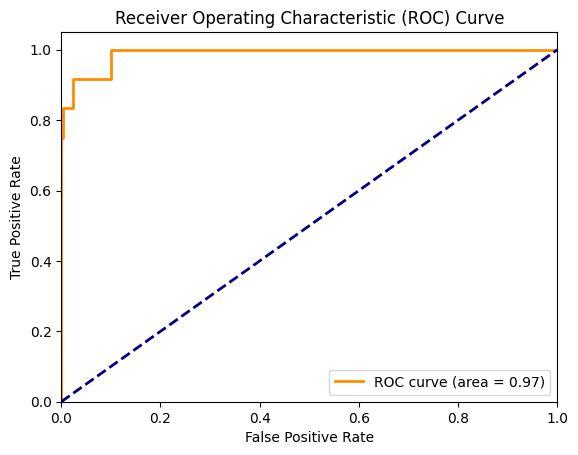

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 1. Accuracy, Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# 2. AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_true_classes, y_pred[:, 1], pos_label=1)
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC-ROC: {auc:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
# Paste your ngrok authtoken here
!ngrok authtoken 2pISX2Z2ywXmFVxdCB4SyVab05N_7268c6cCCmpCBah2qFwGa


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Set the port for Streamlit (default is 8501)
port = 8501

# Create a tunnel for Streamlit
streamlit_url = ngrok.connect(port)
print(f"Streamlit app is running at {streamlit_url}")

# Run the Streamlit app in the background
!streamlit run app.py &


Streamlit app is running at NgrokTunnel: "https://84e1-34-125-203-146.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.203.146:8501

2024-11-24 18:21:25.710191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 18:21:25.733400: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 18:21:25.740749: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 18:21:27.197045: W tensorflow/compiler/tf2tensorrt/utils/py_util

  Stopping...
